In [1]:
# Author: Nurtai Maksat
# Group: CSSE-1605
import tensorflow as tf
import tensorflow_datasets as tf_ds
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

import math
import numpy as np
import matplotlib.pyplot as plt

In [31]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [21]:
class Clothing:
    def __init__(self):
        self.dataset  = None
        self.metadata = None
        self.train_dataset = None
        self.test_dataset  = None
        self.__model = None
        self.prediction = None
        self.BATCH_SIZE = 64
        # Loading Dataset
        self.__load_dataset()
        # Normalizing Dataset to the range [0, 1]
        self.train_dataset = self.train_dataset.map(self.__normalize_dataset)
        self.test_dataset  = self.test_dataset.map(self.__normalize_dataset)
    
    def __load_dataset(self):
        dataset, metadata  = tf_ds.load('fashion_mnist', as_supervised=True, with_info=True)
        self.train_dataset = dataset['train']
        self.test_dataset  = dataset['test']
        self.train_size = metadata.splits['train'].num_examples
        self.test_size = metadata.splits['test'].num_examples
    
    def __normalize_dataset(self, image, label):
        image = tf.cast(image, tf.float32) / 255
        return image, label
    
    def train(self):
        print('>> TRAINING MODEL')
        # Initializing model
        self.__model = Sequential([
            Flatten(input_shape=(28,28,1)),
            Dense(256, activation = tf.nn.relu),
            Dense(128, activation = tf.nn.relu),
            Dense(10,  activation = tf.nn.softmax)
        ])
        self.__model.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])
        self.train_dataset = self.train_dataset.repeat().shuffle(self.train_size).batch(self.BATCH_SIZE)
        self.test_dataset = self.test_dataset.batch(self.BATCH_SIZE)
        # Fitting model
        self.__model.fit(self.train_dataset,
                        epochs=5,
                        steps_per_epoch=math.ceil(self.train_size/self.BATCH_SIZE))
        loss, accuracy = self.__model.evaluate(self.test_dataset,
                                               steps=math.ceil(self.test_size/self.BATCH_SIZE))
        print("\nAccuracy",accuracy,"and loss",loss,"on test dataset")
    
    def predict(self):
        print(">> PREDICTING")
        for test_img, test_label in self.test_dataset.take(1):
            self.test_img = test_img.numpy()
            self.test_label = test_label.numpy()
            self.prediction = self.__model.predict(test_img)
            print("Prediction shape ", self.prediction.shape)

In [22]:
classify = Clothing()
classify.train()

>> TRAINING MODEL
Epoch 1/5
938/938 [==============================] - 38s 40ms/step - loss: 0.4780 - accuracy: 0.8300
Epoch 2/5
938/938 [==============================] - 27s 29ms/step - loss: 0.3484 - accuracy: 0.8732
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.3204 - accuracy: 0.8819
Epoch 4/5
938/938 [==============================] - 28s 29ms/step - loss: 0.2931 - accuracy: 0.8911
Epoch 5/5
157/157 [==============================] - 4s 23ms/step - loss: 0.3298 - accuracy: 0.8821
Accuracy 0.8821 and loss 0.3298289162717807 on test dataset


In [23]:
classify.predict()

>> PREDICTING
Prediction shape  (64, 10)


In [32]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [33]:
predictions = classify.prediction
test_labels = classify.test_label
test_images = classify.test_img

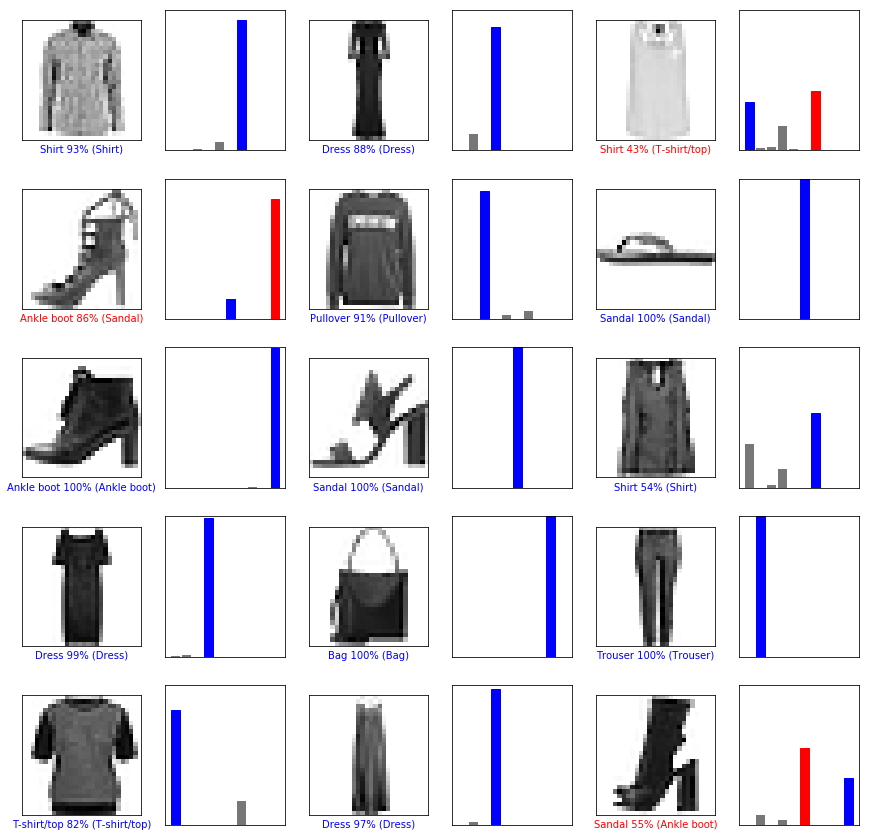

In [43]:
columns, rows = 3, 5
num_img = columns*rows
plt.figure(figsize=(5*columns, 3*rows))
for i in range(num_img):
    plt.subplot(rows,2*columns,2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(rows, 2*columns,2*i+2)
    plot_value_array(i, predictions,  test_labels)